In [ ]:
# ==============================================================================
# DATE: 10-01-2026
# PROJECT: Forecasting the Unemployment Rate in Italy
# MODEL: SARIMA + LSTM (Hybrid Model)
# GENERAL DESCRIPTION:
#
# This script implements a hybrid SARIMA-LSTM model for quarterly unemployment
# time series disaggregated by groups (age and gender).
# The main idea is:
#   1. Fit a SARIMA model to each series to capture trend and seasonality.
#   2. Compute the residuals of the SARIMA model (prediction errors).
#   3. Train an LSTM model on the residuals to learn the remaining nonlinear patterns.
#   4. Combine the SARIMA and LSTM forecasts to improve overall prediction performance.
#
# The script performs:
# - Preprocessing and sliding window creation for LSTM input.
# - Training of both the SARIMA model and the LSTM on the residuals.
# - Model evaluation using MAE, MSE, RMSE, and MAPE metrics, including
#   confidence intervals via bootstrapping.
# - Multi-step forecasting for the next 4 quarters.
# - Storage and visualization of results and forecasts.
#
# OUTPUTS:
# - "unemployment_forecast_metrics_SARIMA_LSTM.xlsx": performance metrics.
# - "unemployment_forecast_SARIMA_LSTM.xlsx": predictions for upcoming quarters.
# ==============================================================================

#Import the file

import pandas as pd
import matplotlib.pyplot as plt
disocupati_trimestral = pd.read_csv('C:/Users/2davi/OneDrive/Desktop/Trabajo/Tesis/Tesis/Disocupati_II.csv', 
                       index_col='Period', 
                       parse_dates=True)
print(disocupati_trimestral)

             15-34 M    15-34 F   35-49 M   35-49 F   50-74 M   50-74 F  \
Period                                                                    
2004-Q1    11.720628  17.198032  4.283283  8.776062  4.004764  5.376203   
2004-Q2    11.410664  16.187372  3.654493  7.196378  3.636536  4.515018   
2004-Q3    10.041510  15.682014  3.520125  6.945425  3.394804  3.976243   
2004-Q4    11.918557  17.227696  4.020448  7.582207  3.604743  3.583677   
2005-Q1    12.334781  16.852636  4.316241  7.577546  3.440298  4.204936   
...              ...        ...       ...       ...       ...       ...   
2024-Q1    12.365911  14.369536  5.682832  8.537508  4.504719  5.837779   
2024-Q2    10.868221  13.000800  4.814713  7.091986  4.057952  4.814553   
2024-Q3    10.391842  10.590439  4.218075  5.802678  3.030988  3.656154   
2024-Q4    10.925559  12.400330  4.410602  6.221986  3.202396  4.001726   
2025-Q1    11.640231  13.868486  4.948448  7.037018  4.070563  4.589607   

           Global_Rate  


=== SARIMA + LSTM on column: 15-34 M ===
MAE=0.823  MSE=1.343  RMSE=1.159  MAPE=6.11%
    95% CI MAE : [0.457, 1.232]
    95% CI MSE : [0.467, 2.412]
    95% CI RMSE: [0.683, 1.553]
    95% CI MAPE: [3.51, 9.01]


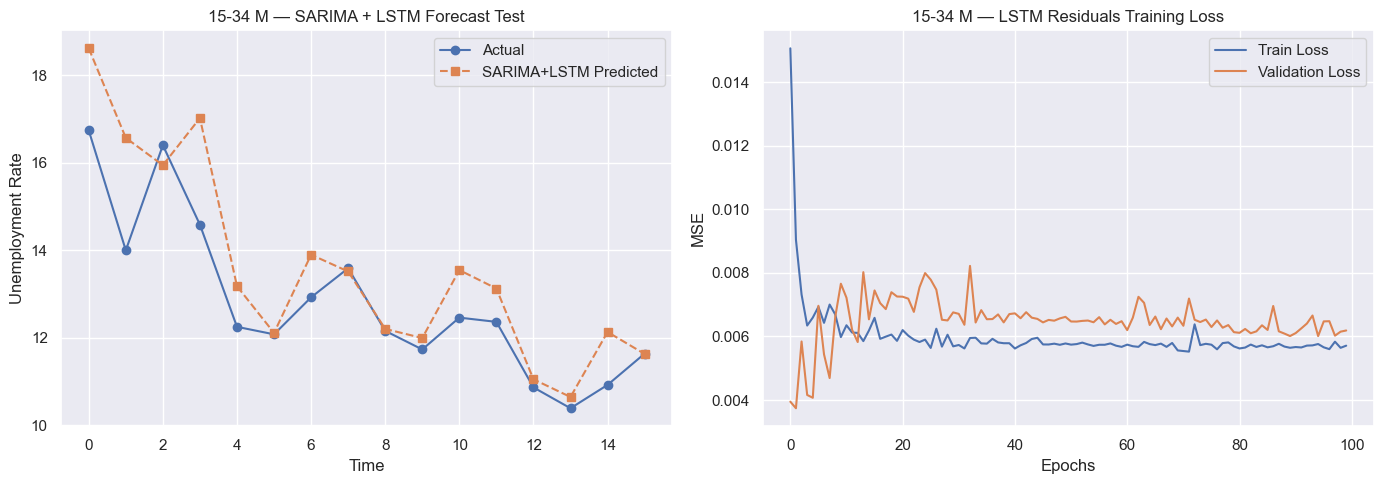


=== SARIMA + LSTM on column: 15-34 F ===
MAE=1.189  MSE=2.014  RMSE=1.419  MAPE=8.30%
    95% CI MAE : [0.839, 1.603]
    95% CI MSE : [0.930, 3.503]
    95% CI RMSE: [0.964, 1.872]
    95% CI MAPE: [5.59, 11.60]


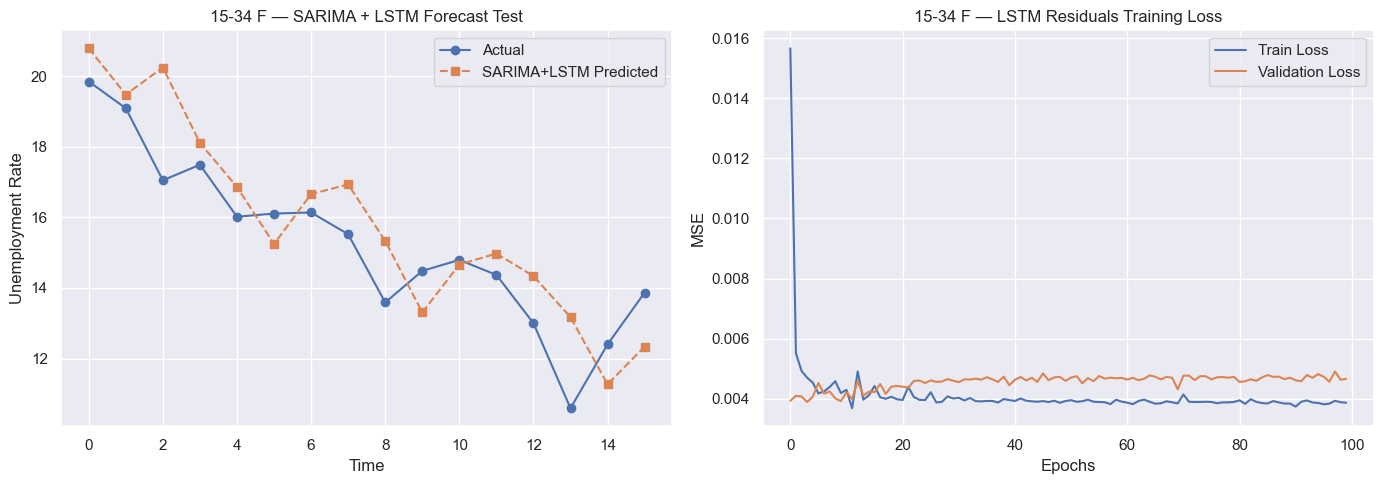


=== SARIMA + LSTM on column: 35-49 M ===
MAE=0.307  MSE=0.146  RMSE=0.382  MAPE=5.67%
    95% CI MAE : [0.201, 0.408]
    95% CI MSE : [0.064, 0.247]
    95% CI RMSE: [0.253, 0.497]
    95% CI MAPE: [3.76, 7.50]


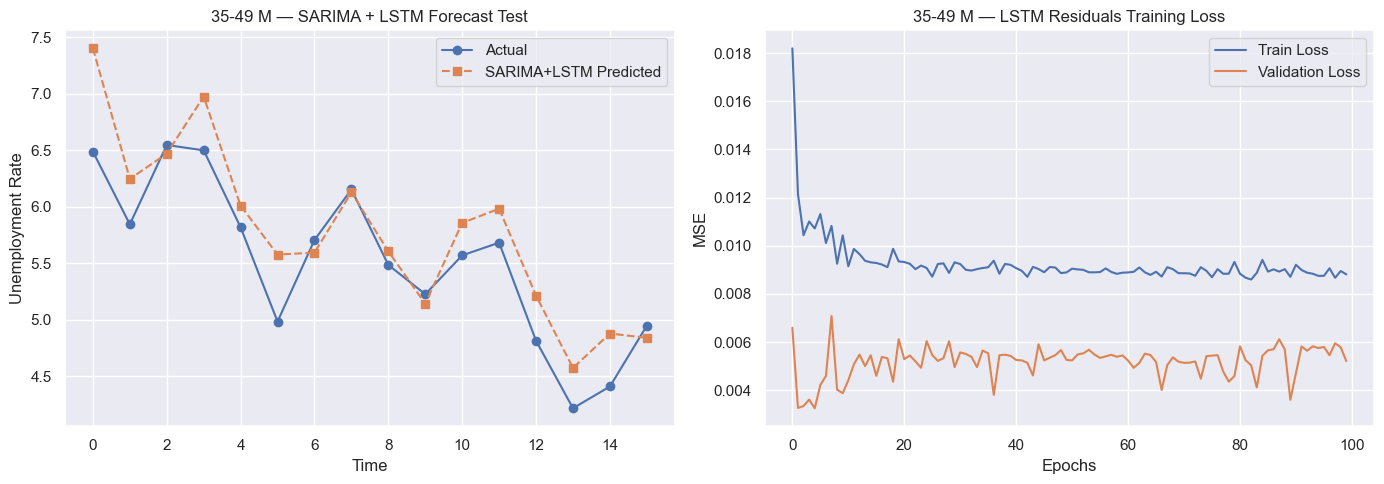


=== SARIMA + LSTM on column: 35-49 F ===
MAE=0.606  MSE=0.540  RMSE=0.735  MAPE=7.67%
    95% CI MAE : [0.426, 0.821]
    95% CI MSE : [0.269, 0.858]
    95% CI RMSE: [0.519, 0.926]
    95% CI MAPE: [5.17, 10.62]


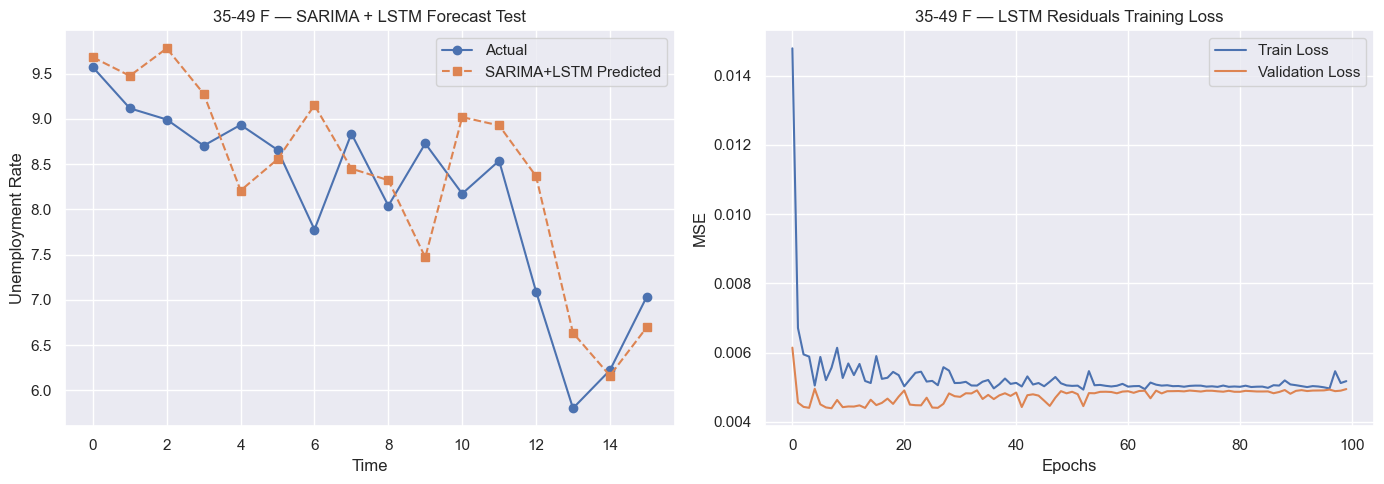


=== SARIMA + LSTM on column: 50-74 M ===
MAE=0.276  MSE=0.132  RMSE=0.363  MAPE=6.96%
    95% CI MAE : [0.164, 0.407]
    95% CI MSE : [0.049, 0.253]
    95% CI RMSE: [0.222, 0.503]
    95% CI MAPE: [3.72, 11.16]


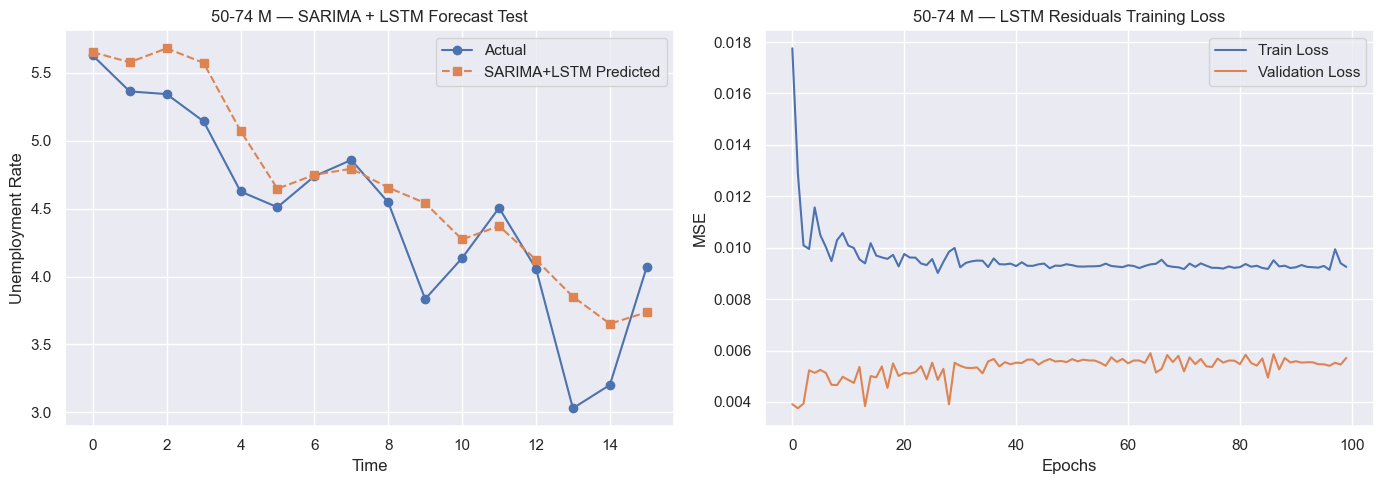


=== SARIMA + LSTM on column: 50-74 F ===
MAE=0.406  MSE=0.256  RMSE=0.506  MAPE=8.34%
    95% CI MAE : [0.267, 0.556]
    95% CI MSE : [0.117, 0.435]
    95% CI RMSE: [0.343, 0.660]
    95% CI MAPE: [4.96, 12.48]


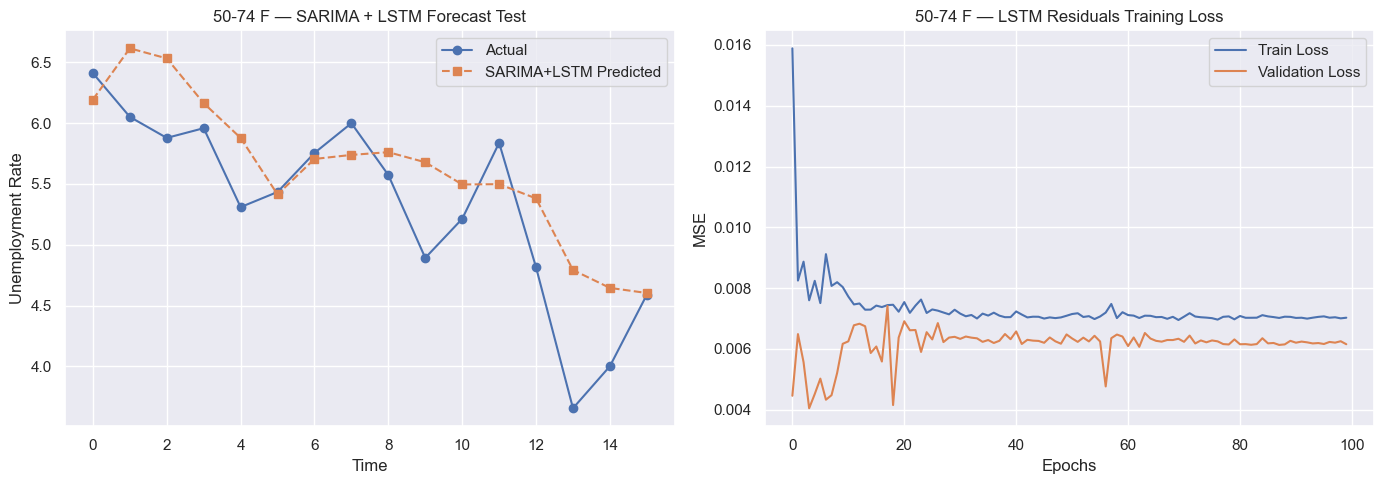


=== SARIMA + LSTM on column: Global_Rate ===
MAE=0.368  MSE=0.195  RMSE=0.442  MAPE=4.95%
    95% CI MAE : [0.244, 0.485]
    95% CI MSE : [0.097, 0.309]
    95% CI RMSE: [0.312, 0.555]
    95% CI MAPE: [3.16, 6.92]


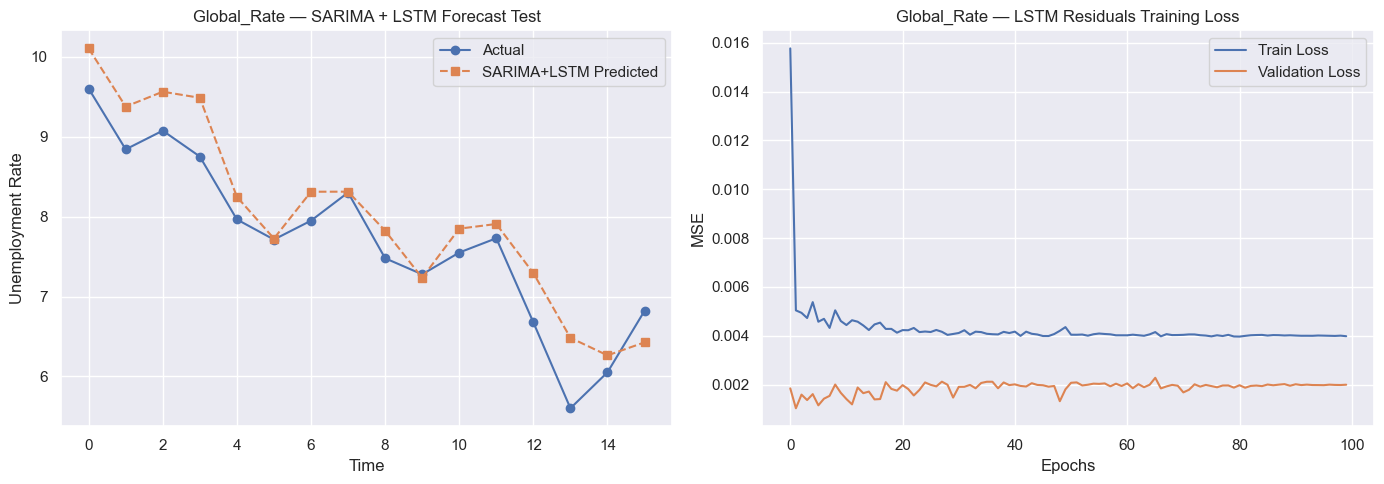

                  MAE   MAE_low  MAE_high       MSE   MSE_low  MSE_high  \
column                                                                    
15-34 M      0.822616  0.456781  1.231585  1.342667  0.466838  2.412236   
15-34 F      1.188656  0.839010  1.602715  2.014032  0.929854  3.502881   
35-49 M      0.306898  0.200586  0.407580  0.146254  0.064112  0.246924   
35-49 F      0.606324  0.425618  0.821289  0.539579  0.269448  0.857980   
50-74 M      0.276107  0.163665  0.407078  0.131595  0.049337  0.252996   
50-74 F      0.405950  0.267488  0.555840  0.256429  0.117415  0.435259   
Global_Rate  0.368392  0.244297  0.485302  0.195165  0.097408  0.308524   

                 RMSE  RMSE_low  RMSE_high      MAPE  MAPE_low  MAPE_high  
column                                                                     
15-34 M      1.158735  0.683255   1.553137  6.110042  3.506209   9.011776  
15-34 F      1.419166  0.964289   1.871599  8.303976  5.586866  11.595118  
35-49 M      0.38243

In [ ]:
# ==============================================================================
# LSTM CONFIGURATIONS (Hybrid SARIMA + LSTM Models)
# Format: SARIMA_LSTM_<ID> → SARIMA(p,d,q)(P,D,Q)[s] + LSTM architecture
#
# LSTM architecture notation:
#   - L: LSTM layer size(s)
#   - D: Dense layer size(s)
#   - Dropout: Regularization dropout rate(s)
#   - LR: Learning rate
#   - WS: Window size
#   - Epochs: Number of training epochs
# ==============================================================================

# SARIMA_LSTM_1 → SARIMA(2,1,3)(1,0,0)[4] + LSTM(L128/L64/D32/D1), 2 Dropouts (0.50), LR=0.001, WS=6, Epochs=200
# SARIMA_LSTM_2 → SARIMA(0,1,0)(1,0,1)[4] + LSTM(L100/D25/D1),  Dropout (0.25), LR=0.01, WS=6, Epochs=200
# SARIMA_LSTM_3 → SARIMA(0,1,1)(1,0,1)[4] + LSTM(L48/D24/D1), Dropout=0.25, LR=0.001, WS=6, Epochs=100
# SARIMA_LSTM_4 → SARIMA(2,1,2)(0,0,1)[4] + LSTM(L100/D25/D1), Dropout=0.50, LR=0.01, WS=6, Epochs=100
# SARIMA_LSTM_5 → SARIMA(2,1,1)(1,0,1)[4] + LSTM(L48/D24/D1), Dropout=0.25, LR=0.001, WS=6, Epochs=100
# SARIMA_LSTM_6 → SARIMA(0,1,3)(1,0,2)[4] + LSTM(L48/D24/D1), Dropout=0.25, LR=0.001, WS=6, Epochs=100
# ARIMA_LSTM_7 → ARIMA(2,1,2) + LSTM(L128/L64/D32/D1), 2 Dropouts (0.50), LR=0.01, WS=6, Epochs=100


import os
import random
import warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, GRU
from tensorflow.keras.optimizers import Nadam

from statsmodels.tsa.statespace.sarimax import SARIMAX  # CHANGED: use SARIMA

# ------------------ SETUP ------------------

# Fix seed for reproducibility
SEED = 12345
os.environ['PYTHONHASHSEED'] = str(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

# Ignore warnings to clean output
warnings.filterwarnings("ignore")

# Apply seaborn theme
sns.set_theme(style="darkgrid")  

# ------------------ HELPER FUNCTIONS ------------------

def create_sequences(data, window_size):
    """
    This function transforms a 1D time series into sliding windows of sequences
    suitable for LSTM model input. The idea is to convert the series into (X, y) pairs where:

    - X is a sequence of length 'window_size' from the time series.
    - y is the value immediately following that sequence.

    Example: if window_size = 3 and data = [10, 20, 30, 40, 50],
    then the result will be:
        X = [[10, 20, 30], [20, 30, 40]]
        y = [40, 50]

    Returns:
        - X: input array of shape (n_samples, window_size, 1)
        - y: target array with future values.
    """
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i : i + window_size])
        y.append(data[i + window_size])
    X = np.array(X).reshape(-1, window_size, 1)
    y = np.array(y)
    return X, y


def bootstrap_ci(y_true, y_pred, metric_func, n_bootstrap=1000, ci=0.95):
    """
    This function estimates a confidence interval (CI) for a chosen evaluation metric 
    (e.g., MAE, MSE, RMSE, or MAPE) using the *bootstrap* resampling technique.

    How it works:
    - Random samples (with replacement) are repeatedly drawn from the prediction errors.
    - The specified metric is calculated for each resampled set.
    - The resulting metric values are sorted and the lower and upper percentiles
      are extracted based on the desired confidence level (default is 95%).

    Parameters:
        - y_true: actual values.
        - y_pred: model predictions.
        - metric_func: error metric function (e.g., mean_absolute_error).
        - n_bootstrap: number of bootstrap iterations.
        - ci: confidence level (default 0.95 = 95%).

    Returns:
        - Lower and upper bounds of the confidence interval for the given metric.
    """
    rng = np.random.default_rng(SEED)
    stats = []
    n = len(y_true)
    for _ in range(n_bootstrap):
        idxs = rng.choice(n, n, replace=True)
        sample_true = y_true[idxs]
        sample_pred = y_pred[idxs]
        stat = metric_func(sample_true, sample_pred)
        stats.append(stat)
    lower = np.percentile(stats, (1 - ci) / 2 * 100)
    upper = np.percentile(stats, (1 + ci) / 2 * 100)
    return lower, upper

# ------------------ PARAMETERS ------------------

sarima_order = (2, 1, 2)       # SARIMA non-seasonal order (p,d,q)
seasonal_order = (0, 0, 0, 4)  # SARIMA seasonal order (P,D,Q,s) for quarterly data
window_size = 6                # LSTM input window size
test_ratio = 0.20              # Train-test split ratio
epochs = 100                   # Number of epochs for LSTM training
batch_size = 4                 # Batch size for LSTM training
learning_rt = 0.01             # Learning rate for optimizer
steps_ahead = 4                # Number of future steps to forecast
forecast_quarters = ["2025-Q2", "2025-Q3", "2025-Q4", "2026-Q1"]  # Forecast horizon labels

# ------------------ DATASET ------------------

# Assume 'df' is disocupati_trimestral DataFrame with columns as different series
# Each column is a time series you want to forecast

# ------------------ STORAGE FOR RESULTS ------------------

all_metrics_sarima_lstm = []
all_forecasts_sarima_lstm = {}

df = disocupati_trimestral  # make sure this variable is defined with your data

# ------------------ MAIN LOOP ------------------

for col in df.columns:
    print(f"\n=== SARIMA + LSTM on column: {col} ===")

    # Original series as float32
    series = df[col].astype("float32")

    # 1) Fit SARIMA model to the series
    sarima_model = SARIMAX(series, order=sarima_order, seasonal_order=seasonal_order, enforce_stationarity=False, enforce_invertibility=False)
    sarima_fit = sarima_model.fit(disp=False)

    # 2) Calculate residuals (errors)
    sarima_pred = sarima_fit.fittedvalues
    residuals = series - sarima_pred

    # Drop NA residuals if any (can appear after differencing)
    residuals = residuals.dropna()

    # 3) Scale residuals for LSTM (range 0-1)
    scaler_res = MinMaxScaler(feature_range=(0, 1))
    residuals_scaled = scaler_res.fit_transform(residuals.values.reshape(-1, 1)).flatten()

    # 4) Create sequences for LSTM training from residuals
    X_res, y_res = create_sequences(residuals_scaled, window_size)

    # Split residual data into train and test sets
    split_idx_res = int(len(X_res) * (1 - test_ratio))
    X_train_res, X_test_res = X_res[:split_idx_res], X_res[split_idx_res:]
    y_train_res, y_test_res = y_res[:split_idx_res], y_res[split_idx_res:]

    # 5) Define and compile LSTM model on residuals
    model_res = Sequential(
        [
            LSTM(128, activation="tanh", return_sequences=True, input_shape=(window_size, 1)),
            Dropout(0.5),
            LSTM(64, activation="tanh", return_sequences=False),
            Dropout(0.5),
            Dense(32, activation="relu"),
            Dense(1),
        ]
    )
    model_res.compile(optimizer=Nadam(learning_rate=learning_rt), loss="mse")

    # Train LSTM model
    history_res = model_res.fit(
        X_train_res,
        y_train_res,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=(X_test_res, y_test_res),
        verbose=0,
    )

    # 6) Predict residuals on test set and invert scaling
    y_pred_res = model_res.predict(X_test_res, verbose=0)
    y_test_res_inv = scaler_res.inverse_transform(y_test_res.reshape(-1, 1))
    y_pred_res_inv = scaler_res.inverse_transform(y_pred_res)

    # 7) Final test prediction = SARIMA fitted values + LSTM residuals predictions
    sarima_pred_test = sarima_pred[-len(y_test_res) :]
    final_pred_test = sarima_pred_test.values + y_pred_res_inv.flatten()

    # 8) Calculate error metrics with bootstrap confidence intervals
    y_true_test = series[-len(y_test_res) :].values

    mae = mean_absolute_error(y_true_test, final_pred_test)
    mse = mean_squared_error(y_true_test, final_pred_test)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((y_true_test - final_pred_test) / y_true_test)) * 100

    mae_ci = bootstrap_ci(y_true_test, final_pred_test, mean_absolute_error)
    mse_ci = bootstrap_ci(y_true_test, final_pred_test, mean_squared_error)
    rmse_ci = bootstrap_ci(y_true_test, final_pred_test, lambda a, b: np.sqrt(mean_squared_error(a, b)))
    mape_ci = bootstrap_ci(y_true_test, final_pred_test, lambda a, b: np.mean(np.abs((a - b) / a)) * 100)

    print(f"MAE={mae:.3f}  MSE={mse:.3f}  RMSE={rmse:.3f}  MAPE={mape:.2f}%")
    print(f"    95% CI MAE : [{mae_ci[0]:.3f}, {mae_ci[1]:.3f}]")
    print(f"    95% CI MSE : [{mse_ci[0]:.3f}, {mse_ci[1]:.3f}]")
    print(f"    95% CI RMSE: [{rmse_ci[0]:.3f}, {rmse_ci[1]:.3f}]")
    print(f"    95% CI MAPE: [{mape_ci[0]:.2f}, {mape_ci[1]:.2f}]")

    # Store metrics
    all_metrics_sarima_lstm.append(
        {
            "column": col,
            "MAE": mae,
            "MAE_low": mae_ci[0],
            "MAE_high": mae_ci[1],
            "MSE": mse,
            "MSE_low": mse_ci[0],
            "MSE_high": mse_ci[1],
            "RMSE": rmse,
            "RMSE_low": rmse_ci[0],
            "RMSE_high": rmse_ci[1],
            "MAPE": mape,
            "MAPE_low": mape_ci[0],
            "MAPE_high": mape_ci[1],
        }
    )

    # 9) Multi-step ahead forecasting combining SARIMA + LSTM residuals

    # Predict future steps with SARIMA
    future_sarima_pred = sarima_fit.forecast(steps=steps_ahead)

    # Predict future residuals iteratively with LSTM
    last_window_res = X_test_res[-1].flatten()
    future_residuals_scaled = []
    input_seq_res = last_window_res.copy()

    for _ in range(steps_ahead):
        input_reshaped = input_seq_res.reshape(1, window_size, 1)
        pred_res = model_res.predict(input_reshaped, verbose=0)[0, 0]
        future_residuals_scaled.append(pred_res)
        input_seq_res = np.roll(input_seq_res, -1)
        input_seq_res[-1] = pred_res

    future_residuals = scaler_res.inverse_transform(np.array(future_residuals_scaled).reshape(-1, 1)).flatten()

    # Combine final multi-step forecast
    final_future_pred = future_sarima_pred.values + future_residuals

    all_forecasts_sarima_lstm[col] = final_future_pred

    # 10) Plot results

    fig, axs = plt.subplots(1, 2, figsize=(14, 5))

    # Left: Test set - actual vs predicted
    axs[0].plot(y_true_test, label="Actual", marker="o")
    axs[0].plot(final_pred_test, label="SARIMA+LSTM Predicted", marker="s", linestyle="--")
    axs[0].set_title(f"{col} — SARIMA + LSTM Forecast Test")
    axs[0].set_xlabel("Time")
    axs[0].set_ylabel("Unemployment Rate")
    axs[0].legend()
    axs[0].grid(True)

    # Right: LSTM training loss
    axs[1].plot(history_res.history["loss"], label="Train Loss")
    axs[1].plot(history_res.history["val_loss"], label="Validation Loss")
    axs[1].set_title(f"{col} — LSTM Residuals Training Loss")
    axs[1].set_xlabel("Epochs")
    axs[1].set_ylabel("MSE")
    axs[1].legend()
    axs[1].grid(True)

    plt.tight_layout()
    plt.show()

# ------------------ SAVE RESULTS ------------------

metrics_sarima_lstm_df = pd.DataFrame(all_metrics_sarima_lstm).set_index("column")
metrics_sarima_lstm_df.to_excel("unemployment_forecast_metrics_SARIMA_LSTM.xlsx")
print(metrics_sarima_lstm_df)

forecast_sarima_lstm_df = pd.DataFrame(all_forecasts_sarima_lstm, index=forecast_quarters)
forecast_sarima_lstm_df.to_excel("unemployment_forecast_SARIMA_LSTM.xlsx")
print(forecast_sarima_lstm_df)
